In [1]:
from imageai.Detection import ObjectDetection

Using TensorFlow backend.


In [2]:
import os

### Set up detector

In [3]:
detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()

In [4]:
# Load model
model_path = 'resnet50_coco_best_v2.0.1.h5'

detector.setModelPath(model_path)
detector.loadModel()

In [5]:
custom_objects = detector.CustomObjects(dog=True, cat=True)

### Detect on image

In [30]:
input_path = 'header_cats_and_dogs.jpg'

In [31]:
output_path = 'result.png'

In [32]:
detections = detector.detectCustomObjectsFromImage(input_image=input_path, output_image_path=output_path, custom_objects=custom_objects, minimum_percentage_probability=45)

In [9]:
for obj in detections:
    print(obj['name'], obj['percentage_probability'])

cat 99.88492727279663
dog 45.17976939678192


In [10]:
from IPython.display import Image

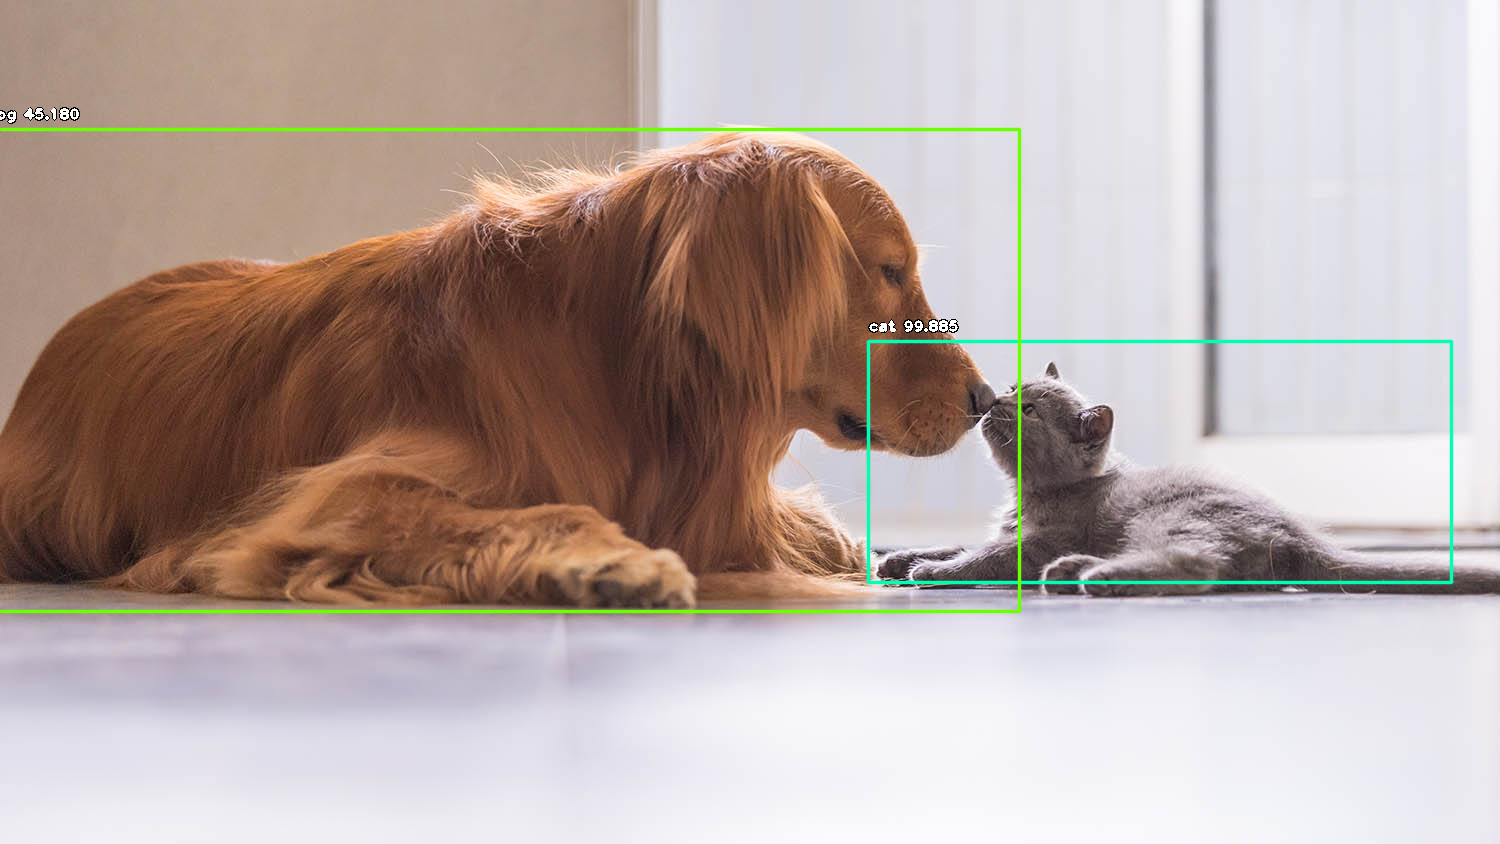

In [11]:
Image('result.png')

### Detect a Folder of Images

In [20]:
import glob

In [21]:
input_images_path = 'dog-pictures/*'

In [22]:
output_images_path = 'results/'

In [25]:
custom_objects = detector.CustomObjects(dog=True, cat=True, bird=True, cow=True, elephant=True, bear=True)

In [33]:
detector.detectCustomObjectsFromImage(input_image='dog-pictures/dog-cat.jpg', output_image_path='results/result_0.jpg', custom_objects=custom_objects, minimum_percentage_probability=40)

[{'box_points': array([411,  55, 652, 364]),
  'name': 'cat',
  'percentage_probability': 95.07493376731873},
 {'box_points': array([ 47,   2, 453, 392]),
  'name': 'dog',
  'percentage_probability': 96.00092768669128}]

In [38]:
# Iterate through folder of images
count = 0
for f in glob.glob(input_images_path):
    # Set output file path
    output_path = output_images_path + 'result_' + str(count) + '.jpg'
    
    # Detect
    print('Detecting...', output_path)
    detector.detectCustomObjectsFromImage(input_image=f, output_image_path=output_path, custom_objects=custom_objects, minimum_percentage_probability=40)
    
    count += 1
    

Detecting... results/result_0.jpg
Detecting... results/result_1.jpg
Detecting... results/result_2.jpg
Detecting... results/result_3.jpg
Detecting... results/result_4.jpg
Detecting... results/result_5.jpg
Detecting... results/result_6.jpg
Detecting... results/result_7.jpg
Detecting... results/result_8.jpg
Detecting... results/result_9.jpg
Detecting... results/result_10.jpg
Detecting... results/result_11.jpg
Detecting... results/result_12.jpg
Detecting... results/result_13.jpg
Detecting... results/result_14.jpg
Detecting... results/result_15.jpg
Detecting... results/result_16.jpg
Detecting... results/result_17.jpg
Detecting... results/result_18.jpg
Detecting... results/result_19.jpg
Detecting... results/result_20.jpg
Detecting... results/result_21.jpg
Detecting... results/result_22.jpg
Detecting... results/result_23.jpg
Detecting... results/result_24.jpg
Detecting... results/result_25.jpg
Detecting... results/result_26.jpg
Detecting... results/result_27.jpg
Detecting... results/result_28

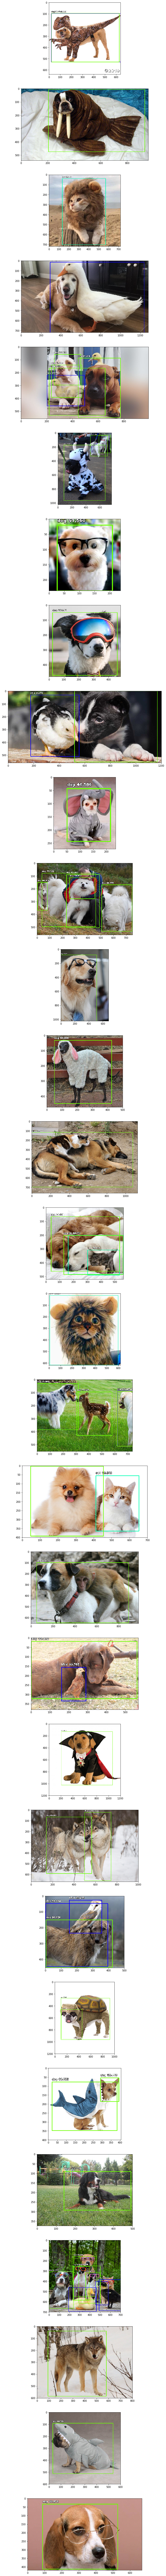

In [45]:
# Display results in notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
output_images = output_images_path + '*'

for f in glob.glob(output_images):
    images.append(mpimg.imread(f))
    
plt.figure(figsize=(200,200))
columns = 1
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    